In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
%cd "/content/drive/MyDrive/Master_Thesis/tts-cgan-main"

/content/drive/MyDrive/Master_Thesis/tts-cgan-main


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df_anon = pd.read_csv('tryout_10_10.csv')
df_anon.pop("ID")
df_anon = df_anon.iloc[:,-188:]
df_anon.head()

,Label,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.489691,...,0.5,0.5,0.5,0.5,0.5,0.498328,0.468519,0.29717,0.25,0.371158
1,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.489691,...,0.5,0.5,0.5,0.5,0.5,0.498328,0.468519,0.29717,0.25,0.371158
2,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.489691,...,0.5,0.5,0.5,0.5,0.5,0.498328,0.468519,0.29717,0.25,0.371158
3,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.489691,...,0.5,0.5,0.5,0.5,0.5,0.498328,0.468519,0.29717,0.25,0.371158
4,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.489691,...,0.5,0.5,0.5,0.5,0.5,0.498328,0.468519,0.29717,0.25,0.371158


In [36]:
# Count the number of rows per label
label_counts = df_anon['Label'].value_counts().reset_index()

# Rename the columns for better readability
label_counts.columns = ['Label', 'Count']

# Display the dataframe
label_counts.head(6)

,Label,Count
0,0.0,994
1,4.0,923
2,2.0,919
3,1.0,800
4,3.0,494


from matplotlib import pyplot as plt
_df_0['Label'].plot(kind='hist', bins=20, title='Label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Label', y='Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Label'].plot(kind='line', figsize=(8, 4), title='Label')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Count'].plot(kind='line', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)

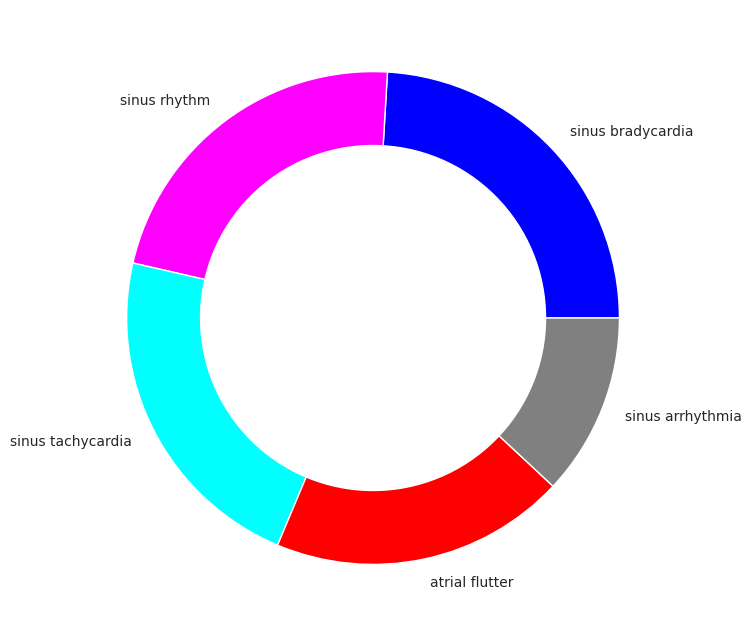

In [51]:
# viewing the distribution of beats in our dataset
plt.figure(figsize=(8, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(label_counts['Count'], labels=['sinus bradycardia', 'sinus rhythm', 'sinus tachycardia',
                                                'atrial flutter', 'sinus arrhythmia'], colors=['blue', 'magenta', 'cyan',
                                                                                   'red', 'grey'])
p = plt.gcf()
p.gca().add_artist(circle)

In [39]:
df_synth = pd.read_pickle("synthdata_ecg_final.pkl")
df_synth.rename(columns={df_synth.columns[-1]: 'Label'}, inplace=True)
df_synth.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,Label
0,1.012982,0.870563,0.258172,0.067712,0.373361,0.788572,0.119267,0.051080,0.045802,0.107177,...,0.000930,0.083605,-0.005736,-0.037379,0.013810,0.057457,-0.060901,-0.023550,-0.038715,0.0
1,0.761121,0.840442,0.237518,0.150995,0.313577,0.568238,0.378127,0.201711,0.044804,0.096489,...,0.010055,0.065172,0.018577,0.023925,-0.006485,0.056809,-0.001018,0.084027,0.018458,0.0
2,0.833689,0.739427,0.339361,0.071712,0.151289,0.323517,0.248655,0.076226,-0.035731,0.067935,...,-0.018106,-0.001938,-0.013946,0.027764,0.022637,0.014742,-0.006114,-0.035147,-0.005614,0.0
3,0.862403,0.782168,0.134940,0.026044,0.071316,0.104579,0.333238,0.055728,0.108634,0.095337,...,0.029480,0.053185,-0.015860,0.034928,-0.004353,0.060316,-0.006814,0.046366,0.004078,0.0
4,0.736012,0.727606,0.281144,0.000070,0.270873,0.198604,0.122387,0.440246,0.123581,0.178335,...,-0.003069,0.011687,0.085442,-0.011518,-0.003832,0.069995,-0.044298,0.030347,-0.004709,0.0


In [40]:
df_sens = pd.read_pickle("ecg_train_final.pkl")
df_sens = df_sens.iloc[:,-188:]
new_column_names = list(range(0, 187))
df_sens = df_sens.rename(columns=dict(zip(df_sens.columns[0:187], new_column_names)))
df_sens.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,Label
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [46]:


def plot_pca(df_sens, df_anon, df_synth):
    datasets = {'Sensitive': df_sens, 'Anonymous': df_anon, 'Synthetic': df_synth}
    pca = PCA(n_components=2)

    # Set the style and color palette
    sns.set_style("whitegrid")
    palette = sns.color_palette("deep")

    # Create subplots
    fig, axes = plt.subplots(5, 1, figsize=(12, 40))  # 5 rows, 1 column

    for label in range(5):
        for i, (name, df) in enumerate(datasets.items()):
            # Filter data by label
            data = df[df['Label'] == label].iloc[:, :-1]
            # Apply PCA
            transformed_data = pca.fit_transform(data)

            # Set point size
            point_size = 150 if name == 'Anonymous' else 40

            # Plot with Seaborn
            sns.scatterplot(x=transformed_data[:, 0], y=transformed_data[:, 1],
                            label=name, color=palette[i], alpha=0.7,
                            s=point_size, ax=axes[label])

        axes[label].set_title(f'PCA for Label {label}', fontsize=20)
        #axes[label].set_xlabel('Principal Component 1', fontsize=12)
        #axes[label].set_ylabel('Principal Component 2', fontsize=12)
        #axes[label].legend(fontsize=10)

        # Improve tick label size
        axes[label].tick_params(axis='both', which='major', labelsize=10)

        # Add a subtle grid
        axes[label].grid(True, linestyle='--', alpha=0.7)

    # Adjust layout
    plt.tight_layout()

    # Save the entire figure
    plt.savefig('pca_plots_all_labels.png', dpi=300)

    # Display the plot
    plt.show()

# Assuming df_sens, df_anon, and df_synth are your DataFrames
plot_pca(df_sens, df_anon, df_synth)

Output hidden; open in https://colab.research.google.com to view.

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def plot_tsne(df_sens, df_anon, df_synth):
    datasets = {'Sensitive': df_sens, 'Anonymous': df_anon, 'Synthetic': df_synth}

    # Set the style and color palette
    sns.set_style("whitegrid")
    palette = sns.color_palette("deep")

    # Create subplots
    fig, axes = plt.subplots(5, 1, figsize=(12, 40))  # 5 rows, 1 column

    for label in range(5):
        for i, (name, df) in enumerate(datasets.items()):
            # Filter data by label
            data = df[df['Label'] == label].iloc[:, :-1]
            # Apply t-SNE
            tsne = TSNE(n_components=2, random_state=42)
            transformed_data = tsne.fit_transform(data)

            # Set point size
            point_size = 150 if name == 'Anonymous' else 20

            # Plot with Seaborn
            sns.scatterplot(x=transformed_data[:, 0], y=transformed_data[:, 1],
                            label=name, color=palette[i], alpha=0.6,
                            s=point_size, ax=axes[label])

        axes[label].set_title(f't-SNE for Label {label}', fontsize=20)
        #axes[label].set_xlabel('t-SNE Component 1', fontsize=12)
        #axes[label].set_ylabel('t-SNE Component 2', fontsize=12)
        #axes[label].legend(fontsize=10)

        # Improve tick label size
        axes[label].tick_params(axis='both', which='major', labelsize=10)

        # Add a subtle grid
        axes[label].grid(True, linestyle='--', alpha=0.7)

    # Adjust layout
    plt.tight_layout()

    # Save the entire figure
    plt.savefig('tsne_plots_all_labels.png')

    # Display the plot
    plt.show()

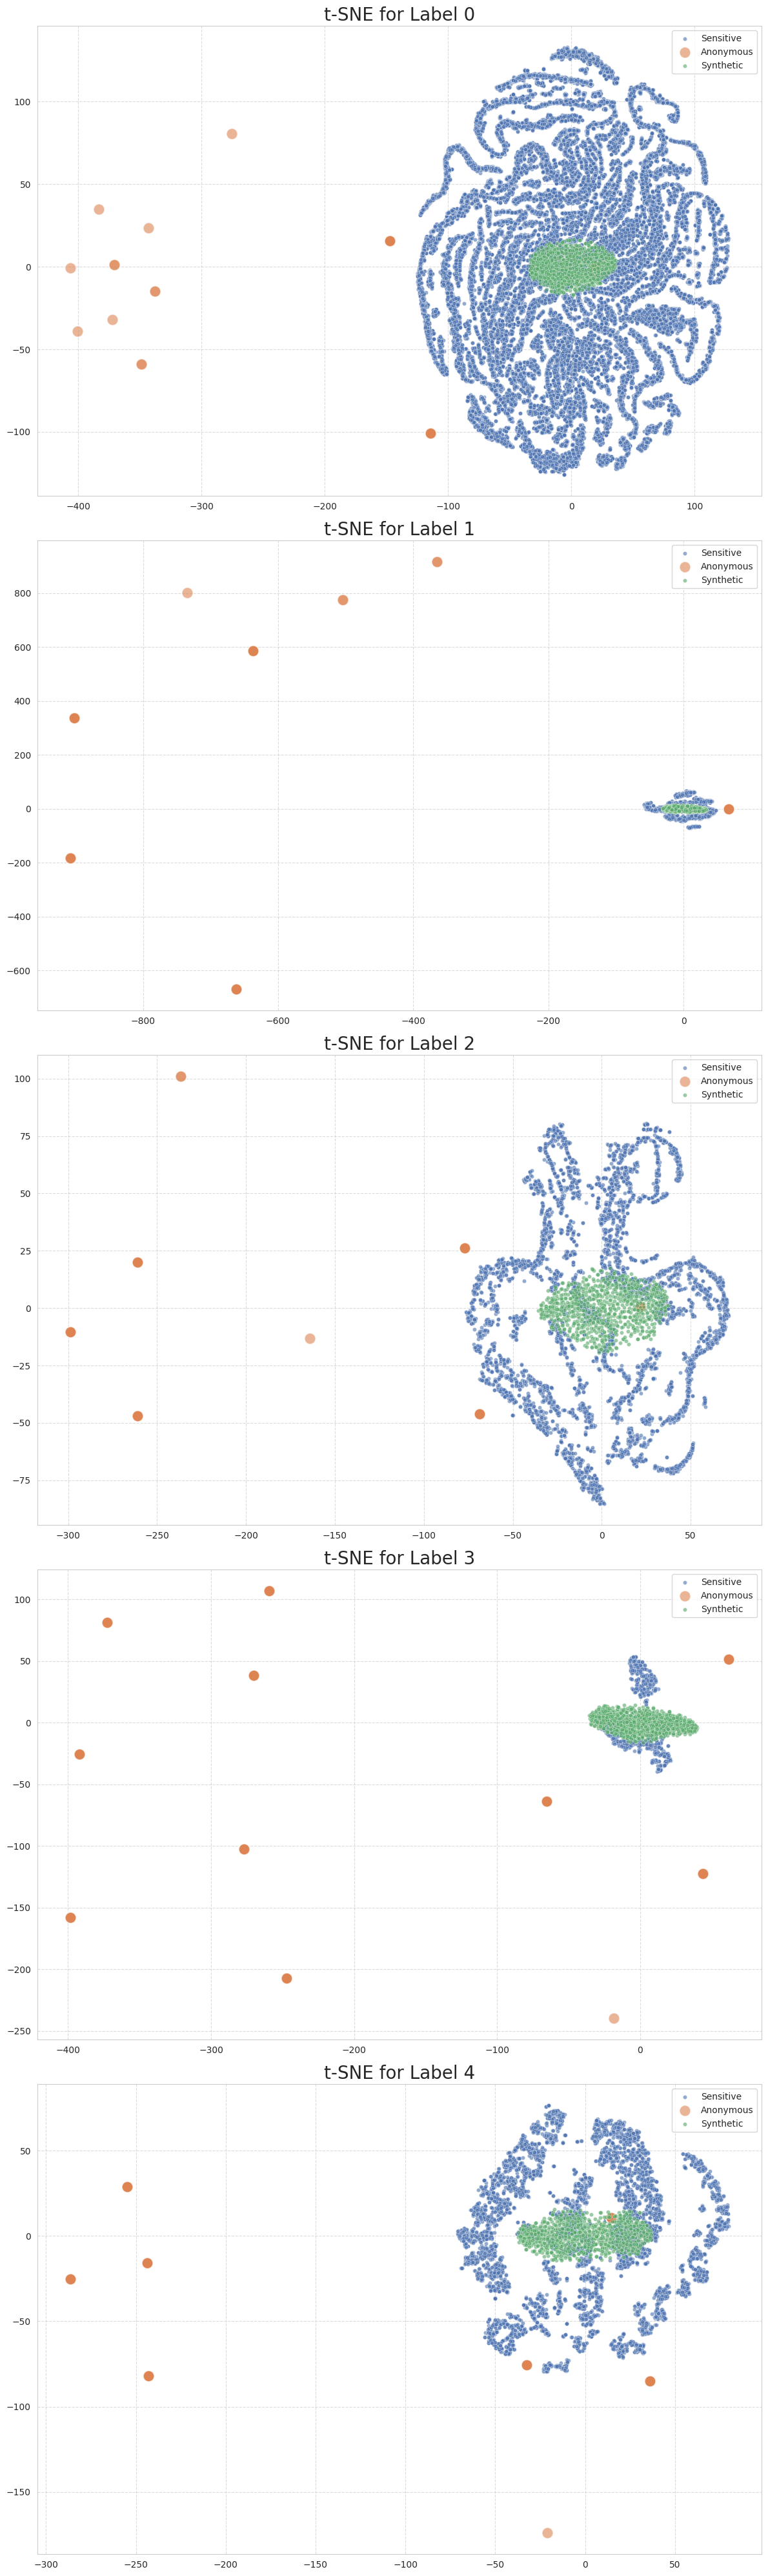

In [49]:
plot_tsne(df_sens, df_anon, df_synth)

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer # Import the SimpleImputer


In [ ]:
def compute_nndr_like(dataset1, dataset2):

    # Create an imputer to fill NaN values with the mean of each column
    imputer = SimpleImputer(strategy='mean')

    # Fit the imputer on dataset2 and transform both datasets
    dataset1 = imputer.fit_transform(dataset1)
    dataset2 = imputer.transform(dataset2)

    nn = NearestNeighbors(n_neighbors=4, metric='euclidean')
    nn.fit(dataset2)
    distances, _ = nn.kneighbors(dataset1)
    nndr_scores = distances[:, 0] / distances[:, 1]
    return nndr_scores

# Convert all column names to strings
df_synth.columns = df_synth.columns.astype(str)
df_sens.columns = df_sens.columns.astype(str)

# Compute NNDR-like scores
nndr_scores = compute_nndr_like(df_sens, df_synth)

In [ ]:
nndr_scores

array([0.99655731, 0.98710463, 0.88948758, ..., 0.97431656, 0.97431656,
       0.97431656])

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.neighbors import NearestNeighbors

def compute_nndr_rowwise(dataset1, dataset2, imputation_strategy='mean'):
    if dataset1.shape[1] != dataset2.shape[1]:
        raise ValueError("Datasets must have the same number of features")

    imputer = SimpleImputer(strategy=imputation_strategy)

    dataset1_imputed = imputer.fit_transform(dataset1)
    dataset2_imputed = imputer.transform(dataset2)

    nn = NearestNeighbors(n_neighbors=10, metric='euclidean')
    nn.fit(dataset2_imputed)

    distances, _ = nn.kneighbors(dataset1_imputed)

    # Normalize distances to [0, 1] range
    max_distance = np.max(distances)
    nndr_scores = 1 - (distances / max_distance)

    return nndr_scores.flatten()

# Usage
try:
    nndr_scores = compute_nndr_rowwise(df_sens, df_synth)
    print("NNDR scores computed successfully")
except Exception as e:
    print(f"Error computing NNDR scores: {e}")

NNDR scores computed successfully


In [ ]:
nndr_scores

array([0.75087999, 0.75001939, 0.74673895, ..., 0.79758843, 0.79627806,
       0.79534739])

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

def compute_dcr(synthetic_data, target_data, n_neighbors=1, imputation_strategy='mean'):
    if synthetic_data.shape[1] != target_data.shape[1]:
        raise ValueError("Datasets must have the same number of features")

    # Impute missing values
    imputer = SimpleImputer(strategy=imputation_strategy)
    synthetic_imputed = imputer.fit_transform(synthetic_data)
    target_imputed = imputer.transform(target_data)

    # Standardize the data
    scaler = StandardScaler()
    synthetic_scaled = scaler.fit_transform(synthetic_imputed)
    target_scaled = scaler.transform(target_imputed)

    # Compute nearest neighbors
    nn = NearestNeighbors(n_neighbors=n_neighbors, metric='euclidean')
    nn.fit(target_scaled)

    distances, _ = nn.kneighbors(synthetic_scaled)

    # DCR is the distance to the closest record
    dcr_scores = distances[:, 0]

    return dcr_scores

# Usage
try:
    dcr_scores = compute_dcr(df_synth, df_sens)
    print("DCR scores computed successfully")
    print(f"Mean DCR: {np.mean(dcr_scores)}")
    print(f"Median DCR: {np.median(dcr_scores)}")
except Exception as e:
    print(f"Error computing DCR scores: {e}")

DCR scores computed successfully
Mean DCR: 10.937107730020115
Median DCR: 10.24027640990123


In [ ]:
print(f"Mean DCR: {np.mean(nndr_scores)}")
print(f"Median DCR: {np.median(nndr_scores)}")

Mean DCR: 0.7501531668501391
Median DCR: 0.796278059185448


In [58]:
# Compute statistics for each dataframe
statistics_sens = df_sens.agg(['mean', 'median', 'var']).T.reset_index()
statistics_synth = df_synth.agg(['mean', 'median', 'var']).T.reset_index()
statistics_anon = df_anon.agg(['mean', 'median', 'var']).T.reset_index()

# Add a 'Dataframe' column to each statistics dataframe
statistics_sens['Dataframe'] = 'df_sens'
statistics_synth['Dataframe'] = 'df_synth'
statistics_anon['Dataframe'] = 'df_anon'

# Combine all statistics into a single dataframe
summary = pd.concat([statistics_sens, statistics_synth, statistics_anon], ignore_index=True)

# Rename columns for clarity
summary.columns = ['Column', 'Mean', 'Median', 'Variance', 'Dataframe']

# Display the summary dataframe
print(summary)

    Column      Mean    Median  Variance Dataframe
0        0  0.890360  0.991342  0.058037   df_sens
1        1  0.758160  0.826013  0.049201   df_sens
2        2  0.423972  0.429472  0.051668   df_sens
3        3  0.219104  0.166000  0.042799   df_sens
4        4  0.201127  0.147878  0.031349   df_sens
..     ...       ...       ...       ...       ...
559    183  0.471541  0.498328  0.012634   df_anon
560    184  0.443334  0.468519  0.011168   df_anon
561    185  0.281196  0.297170  0.004493   df_anon
562    186  0.236562  0.250000  0.003180   df_anon
563    187  0.351208  0.371158  0.007009   df_anon

[564 rows x 5 columns]


In [60]:
def compute_avg_stats(df, name):
    return pd.DataFrame({
        'Dataframe': [name],
        'Mean': [df.values.mean()],
        'Median': [np.median(df.values)],
        'Variance': [df.values.var()]
    })

# Compute average statistics for each dataframe
summary_sens = compute_avg_stats(df_sens, 'df_sens')
summary_synth = compute_avg_stats(df_synth, 'df_synth')
summary_anon = compute_avg_stats(df_anon, 'df_anon')

# Combine all summaries into a single dataframe
summary = pd.concat([summary_sens, summary_synth, summary_anon], ignore_index=True)

# Display the summary dataframe
print(summary)

  Dataframe      Mean    Median  Variance
0   df_sens       NaN       NaN       NaN
1  df_synth  0.169651  0.090818  0.069779
2   df_anon  0.487250  0.500000  0.030899


In [65]:
df_sens_drop.values.mean()

<ipython-input-65-f2c521092571>:1: RuntimeWarning: Mean of empty slice.
  df_sens_drop.values.mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


nan

In [64]:
df_sens_drop = df_sens.dropna(axis=1)